Leaderboard:
Player Name  Player Type
Bob          Bot            3
Darius       Human          3
Alice        Bot            2
Name: Player Symbol, dtype: int64


Average moves for win:
6.625


Wins by player type:


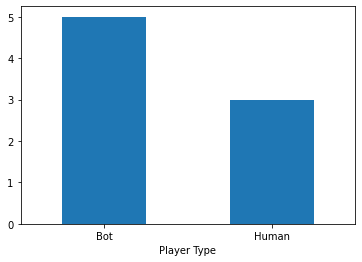

In [12]:
import pandas as pd
from datetime import datetime, date
from os.path import exists

class DataHandling():
    """
    Handles data from and to csv files.
    """
    def __init__(self, game_file, move_file):
        self.game_file = game_file
        self.move_file = move_file
        if (exists(self.game_file)):
            self.game_data = pd.read_csv(self.game_file)
        else:
            self.game_data = pd.DataFrame(columns=[
                "Timestamp",
                "Player 1 Name",
                "Player 1 Symbol",
                "Player 1 Type",
                "Player 2 Name",
                "Player 2 Symbol",
                "Player 2 Type",
                "Winner",
                "Move Count",
            ])
        if (exists(self.move_file)):
            self.move_data = pd.read_csv(self.move_file)
        else:
            self.move_data = pd.DataFrame(columns=[
                "Game ID",
                "Move Number",
                "Player Name",
                "Player Type",
                "Player Symbol",
                "Board Position",
            ])
    
    def record_game_data(self, is_winner, p1_name, p1_symbol, p1_type, p2_name, p2_symbol, p2_type, winner, move_count):
        self.game_data.loc[len(self.game_data)] = {
                "Game ID": len(self.game_data),
                "Timestamp": datetime.now(),
                "Player 1 Name": p1_name,
                "Player 1 Symbol": p1_symbol,
                "Player 1 Type": p1_type,
                "Player 2 Name": p2_name,
                "Player 2 Symbol": p2_symbol,
                "Player 2 Type": p2_type,
                "Winner": winner if is_winner == True else "None-Draw",
                "Move Count": move_count,
            }
        self.game_data.to_csv(self.game_file, index=False)
        

    # NEED TO ADD GAME ID:
    def record_move_data(self, move_num, player_name, player_type, player_symbol, board_position):
        self.move_data.loc[len(self.move_data)] = {
                "Game ID": len(self.game_data),
                "Move Number": move_num,
                "Player Name": player_name,
                "Player Type": player_type,
                "Player Symbol": player_symbol,
                "Board Position": board_position,
        }
        self.move_data.to_csv(self.move_file, index=False)

class DataViz:
    """
    Visualize game data.
    """
    def __init__(self, game_data):
        self.game_data = game_data
        self.win_data = self.game_data[self.game_data["Winner"] != "None-Draw"]
        self.win_data_p1 = self.win_data[self.win_data["Player 1 Symbol"] == self.win_data["Winner"]]
        self.win_data_p1 = self.win_data_p1[["Player 1 Name", "Player 1 Symbol", "Player 1 Type"]]
        self.win_data_p1 = self.win_data_p1.rename(columns={"Player 1 Name": "Player Name", "Player 1 Symbol": "Player Symbol", "Player 1 Type": "Player Type"})
        self.win_data_p2 = self.win_data[self.win_data["Player 2 Symbol"] == self.win_data["Winner"]]
        self.win_data_p2 = self.win_data_p2[["Player 2 Name", "Player 2 Symbol", "Player 2 Type"]]
        self.win_data_p2 = self.win_data_p2.rename(columns={"Player 2 Name": "Player Name", "Player 2 Symbol": "Player Symbol", "Player 2 Type": "Player Type"})
        self.win_data_all = pd.concat([self.win_data_p1, self.win_data_p2])

    def wins_by_player(self):
        return self.win_data_all.groupby(["Player Name", "Player Type"], sort=True)["Player Symbol"].count().sort_values(ascending = False)

    def move_count_avg(self):
        return self.win_data["Move Count"].mean()

    def wins_by_type(self):
        self.win_data_by_type = self.win_data_all.groupby(["Player Type"], sort=True)["Player Symbol"].count().sort_values(ascending = False)        
        self.win_data_by_type.plot.bar(x="Player Type", rot=0)

datahandling = DataHandling("./data/games.csv", "./data/moves.csv")
dataviz = DataViz(datahandling.game_data)
print("Leaderboard:")
print(dataviz.wins_by_player())
print("\n\nAverage moves for win:")
print(dataviz.move_count_avg())
print("\n\nWins by player type:")
dataviz.wins_by_type()